<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#867070;
           font-size:110%;
           font-family:Arial;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    <h1><center><i>Gradient Descent</i></center></h1>
</p>
</div>


### Let's start with a quiz here - 
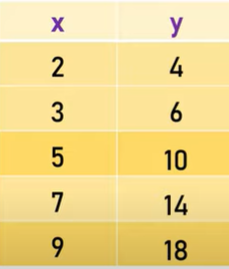

I want to find the relationship function between x & y, so that the function describe the relationship between these two variable. 

The function is,`y = x * 2`

Again this, how about this one - 

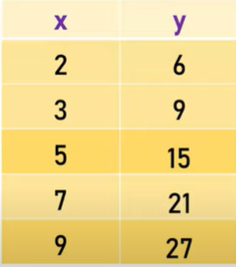

The function is,`y = x * 3`

Again this, how about this one - 

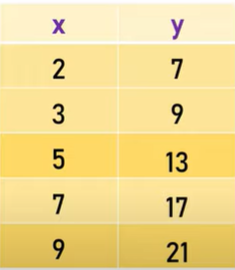

The function is,`y = x * 2 + 3`

Again this, how about this one - 

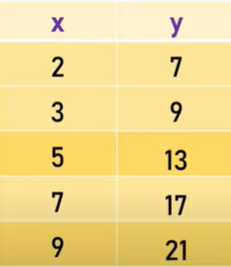

Well this might be not that easy, Correct!
<h3>But</h3> if you give this to a computer, computer has a technique called a`Gradient Descent` . Using this technique it will find out the linear equation for this particular problem. The function is,`y = x * 0.5 - 1.5`

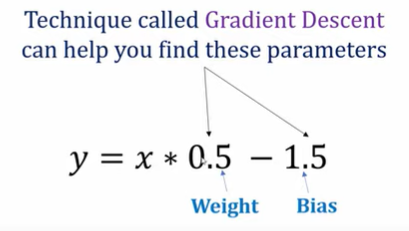

**`y = x * 0.5 - 1.5` This is also called prediction function**. Means, in future if we change x values then y will change. That's the main point of Supervised Machine Learning technique or deep learning.

### Let's look a Insurance Datasets here-

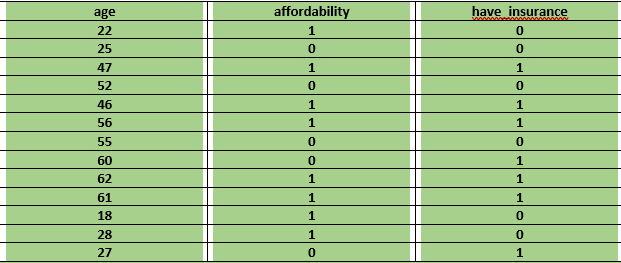

<h2>Binary Classification</h2> 

`Based on age & affordability, come up with a function that can predict if a person will buy insurance or not `

So here age and afforability is x & have_insurance is y or `y = f(x)` we are here trying to figure out this function f(x).

See here - 

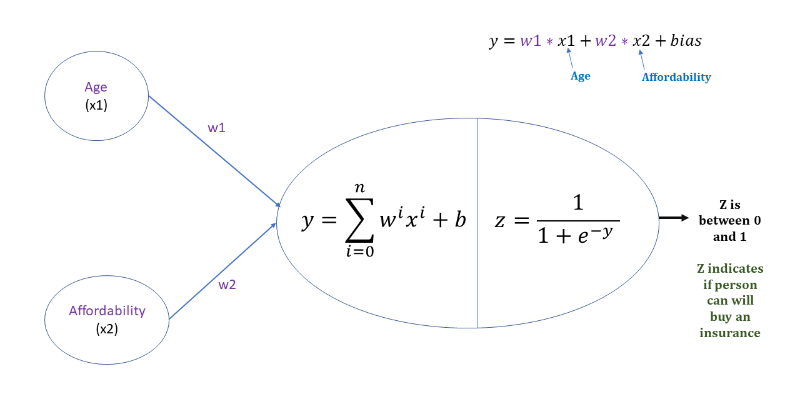

Here it's a simple neural network with a single neuron. We have two input neurons but often we are talking about neural we don't take into consideration the input neurons hence this has only single neuron it's a logistic function. Logistic regression is a very simple case of a neural network having a singel neuron and in logistic regression there"are two components- one is ,<b> Weighted Sum </b> and another is <b> Sigmoid function </b>.

When we training a neural network, it should be remember that Gradient Descent is used during training of a neural network. SO Let's say, from above datasets, we have 13 data points, we will use all of this to train my network. So, I will feed the first sample,



I will initialize the weight to osme random value, here I do it as 1 and I will also initialize the bias which is here in zero and then we feed the first sample into the network, this is called `Forward Pass`.

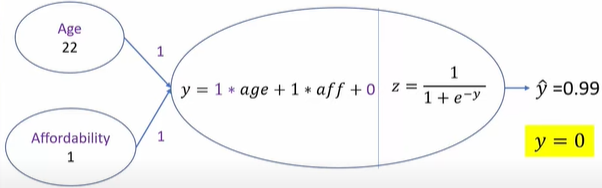

For this sample it will be predicted value 0.99 & truth data is 0. So y is a predictcted value. Here we have the predicted value and the truth value. So, we will find the error value. 
So, the error is - 

<h2>error1 = -(truth value * log(predicted value) + (1 - truth value) * log (1 - predicted value)) = 4.6</h2>

for logistic regression we will use log loss, we don't use mean squared error or a mean absolute error. This is just a mathemetical equation for log loss. So, the first error comes to be a 4.6. Repeat this same process for all the samples in datasets.

<h2>Total Errors = sum of all the samples valuses in datasets</h2>

Then we calculate the Loss - 

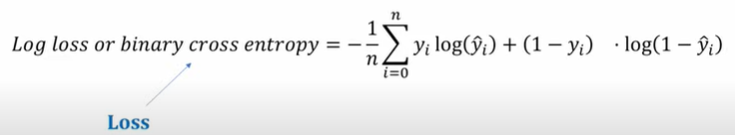

So, after the first epoch(Epoch is going through all training samples once, so here once we gone through training samples number 1 to 13 that means we have completed one epoch) which is 4.31. Then our goal is to back propagate the loss, so we can adjust the weight1(w1) and weight2(w2). It should be remember, whenever we train neural network we have to train multiple epoch until we get the correct value of weight1(w1) and weight2(w2). Now, the goal is adjust w1 & w2 in such a way so that my log loss is reduced  or less than 4.31. We can do this - w1 = w1 - adjust value, basically subtract or add some value with w1. So, what is the adjust value? We will do it using dervative. Like this - 

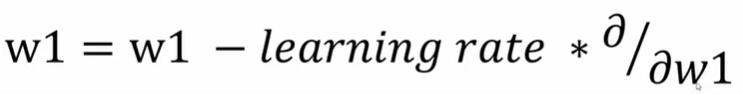

Learning rate usually 0.01, people assume, its just limiting the derivative fucntion. Here, 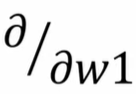 this shows the loss is changing for a given change in w1. Then we will find log loss derivative using this formula 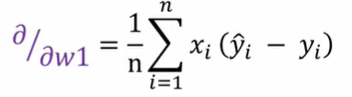

For bias - 

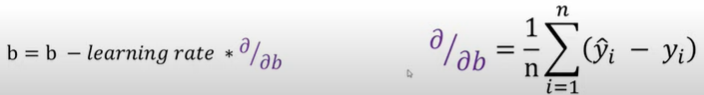

We are using batch gradient descent actually. So, when should we stop to assume the weight value to training, we will stop when the error function is a convex function(its like a boat curve) or we found the global minima.

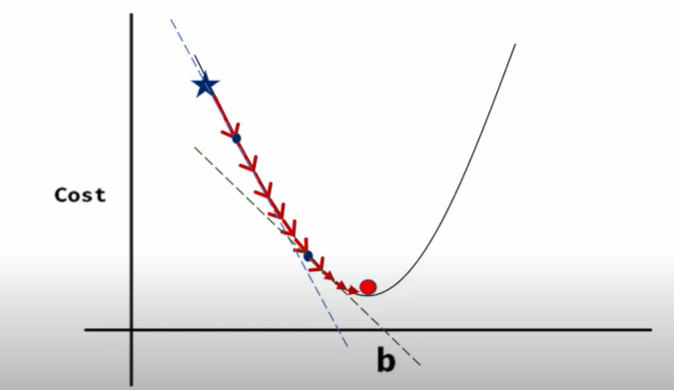

we are doing derivative which is tangent here shown and trying to move point and get the global minima. **Lets move into code**

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#867070;
           font-size:110%;
           font-family:Arial;
           letter-spacing:0.5px">
​
<p style="padding: 10px;
              color:white;">
    <h1><center><i>Implement Gradient Descent For Neural Network (or Logistic Regression)</i></center></h1>
</p>
</div>
​

In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../input/insurancedataset/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [3]:
df.shape

(28, 3)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

20% data is for test. Look shape is 28 and here train set is only 22

In [5]:
len(X_train)

22

**Preprocessing: Scale the data so that both age and affordability are in same scaling range**

In [7]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

We scaled to make both age and affordability column value in between 0 to 1. Doing this, our model tends to be better

In [8]:
X_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


**Model Building: First build a model in Keras/tensorflow and see what weights and bias values it comes up with. We will then try to reproduce same weights and bias in our plain python implementation of gradient descent.**

Here we have one neuron, input is two, activation function we used sigmoid, weights are 1 , bias is zero

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']
             )
model.fit(X_train_scaled, y_train, epochs = 5000) #i use epochs 5000 just use trial and error method

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1/1 [=

**Evaluate the model on test set**

In [10]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.3550 - accuracy: 1.0000


[0.3549776077270508, 1.0]

We get 100% 

In [11]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 68ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.82949823]], dtype=float32)

In [12]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Get the value of weights and bias from the model**

In [13]:
coef, intercept = model.get_weights()

In [14]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

This means w1 = 5.0608625, w2 = 1.408652, bias = - 2.9137027

In [15]:
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [16]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


### Inseatd of model.predict, write our own predciton function that uses w1, w2, bias

In [17]:
def prediction_function(age, affordability):
    weighted_sum = coef[0] * age + coef[1] * affordability + intercept
    return sigmoid(weighted_sum)
prediction_function (.47, 1)

0.705484819775958

In [18]:
prediction_function(.18, 1)

0.35569571637887243

### From Scratch
**Now we implement gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [19]:
def sigmoid_numpy(X):
    return 1 / (1 + np.exp(-X))

sigmoid_numpy(np.array([12, 0 , 1]))

array([0.99999386, 0.5       , 0.73105858])

In [28]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i, epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1 - epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true * np.log(y_predicted_new) + (1 - y_true) * np.log(1 - y_predicted_new))


Finally comes to gradient descent function

In [29]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [30]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.6812647787377569
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044203
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bi

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [31]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

## Done!